# Classification of Iris Flowers with Decision Tree Classifier
A classification task on the famous Iris flowers dataset using a decision tree classifier. The goal is to build a model that can accurately classify different species of Iris flowers based on their attributes.

### Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [2]:
path = "C:/Users/kamalesh k b/Downloads/iris.xlsx"

In [3]:
df = pd.read_excel(path)

In [4]:
df.shape

(150, 5)

### Data Preparation and Exploration
In the first section, we perform data preparation and exploration tasks on the dataset. The necessary libraries are imported, including pandas, numpy, matplotlib.pyplot, seaborn, and sklearn. Some warning messages are filtered to avoid cluttering the output.

In [5]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.sample(5)

,Sepal length,Sepal width,Petal length,Petal width,Class
90,5.5,2.6,4.4,1.2,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
113,5.7,2.5,5.0,2.0,Iris-virginica


In [7]:
df.tail()

,Sepal length,Sepal width,Petal length,Petal width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


#### df.describe().T: 
This code generates descriptive statistics of the dataset, providing information such as count, mean, standard deviation, minimum, and maximum values for each attribute.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


#### df.info(): 
This code displays a summary of the dataset, including the number of samples and columns, as well as the data types of each column.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.isnull()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [11]:
df.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Class           0
dtype: int64

#### df.duplicated().sum(): 
This code checks for duplicated rows in the dataset and returns the count of duplicated instances.

In [12]:
df.duplicated().sum()

3

In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(147, 5)

#### count = df['Class'].value_counts(): 
This code counts the occurrences of each class (species) in the 'Class' column and stores the results in the 'count' variable.

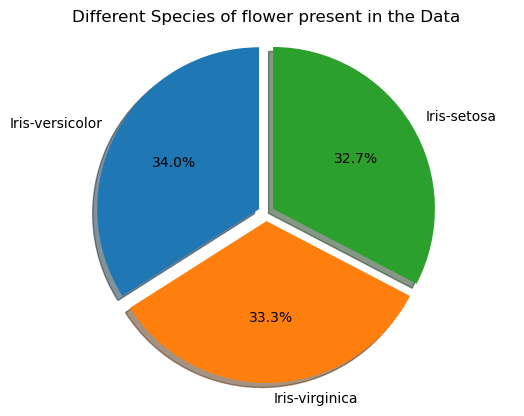

In [15]:
count = df['Class'].value_counts()
count.to_frame()

label = count.index.tolist()
val = count.values.tolist()

exp = (0.05,0.05,0.05)
fig,ax = plt.subplots()
ax.pie(val, explode=exp, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Different Species of flower present in the Data")
ax.axis('equal')
plt.show()

#### Visualization of Class Distribution: 
This code creates a pie chart to visualize the distribution of different flower species in the dataset. The chart displays the percentage of each class using labels and autopct.

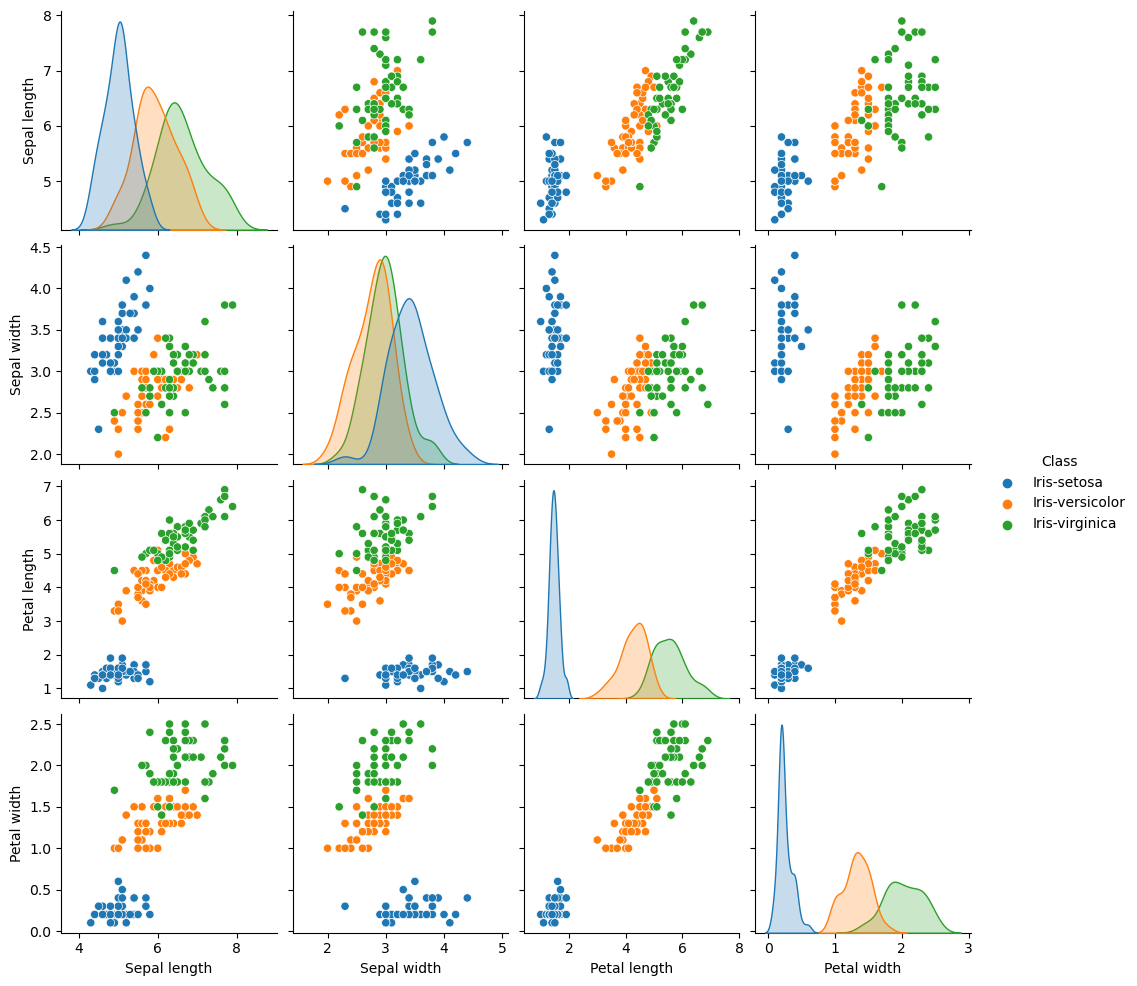

In [16]:
sns.pairplot(df, hue = 'Class')

#### df.corr(): 
This code computes the correlation matrix of the dataset, showing the pairwise correlation between attributes

In [17]:
df.corr()

,Sepal length,Sepal width,Petal length,Petal width
Sepal length,1.000000,-0.109321,0.871305,0.817058
Sepal width,-0.109321,1.000000,-0.421057,-0.356376
Petal length,0.871305,-0.421057,1.000000,0.961883
Petal width,0.817058,-0.356376,0.961883,1.000000


#### Heatmap Visualization: 
This code creates a heatmap using the seaborn library to visualize the correlation matrix. The heatmap provides a graphical representation of the correlations between attributes.

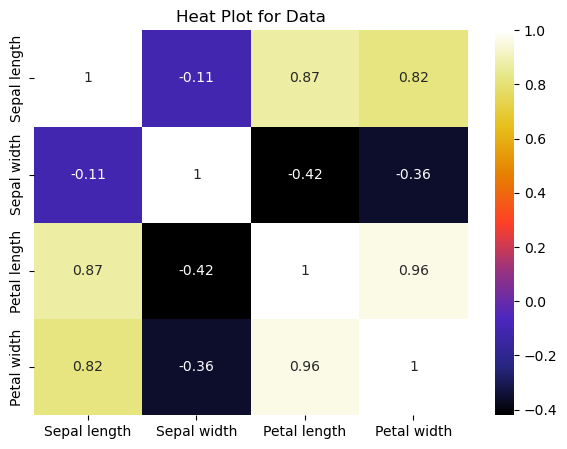

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True,cmap='CMRmap')
plt.title('Heat Plot for Data')
plt.show()

In [19]:
x = df.drop(columns='Class', axis=1)
y = df['Class']

In [20]:
x.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Class, dtype: object

In [22]:
lst = y.unique().tolist()

### Model Training and Evaluation

#### Train_Test_Split: 
This code splits the dataset into training and testing sets, with 70% of the data used for training and 30% for testing. 'x' represents the input features, and 'y' represents the target variable (class labels).

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=12)

## Decision Tree Classification

In [24]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
pred = DT.predict(x_test)

In [26]:
DT_Accuracy_Score = accuracy_score(y_test, pred)
DT_F1_Score = f1_score(y_test, pred, average='weighted')
print('DT Accuracy Score: ', DT_Accuracy_Score)
print('DT F1 Score: ', DT_F1_Score)

DT Accuracy Score:  0.9777777777777777
DT F1 Score:  0.9778953556731335


#### Confusion Matrix Visualization: 
This code computes the confusion matrix between the predicted and true labels and displays it using the ConfusionMatrixDisplay from sklearn.metrics. The confusion matrix provides insights into the classifier's performance across different classes.

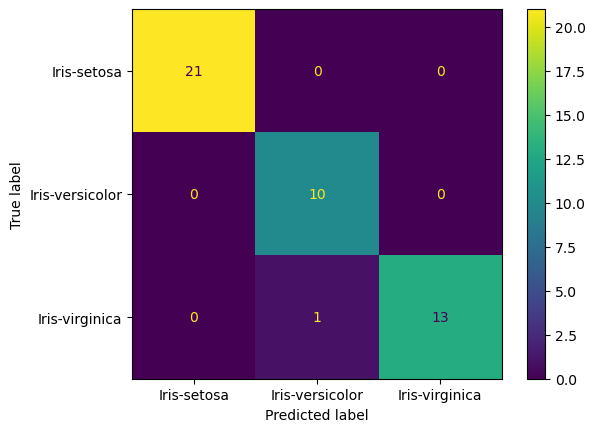

In [27]:
cm = confusion_matrix(y_test, pred, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,                          
                              display_labels=DT.classes_)
disp.plot()

In [28]:
df.drop(columns='Class',inplace=True)
x = df.columns.to_list()
print(x)

['Sepal length', 'Sepal width', 'Petal length', 'Petal width']


## Decision Tree Visualization
A graphical representation of the decision tree classifier. It creates a figure with a specified size and uses the plot_tree function from sklearn.tree to plot the decision tree. The feature names and class names are provided to label the tree nodes, and the filled parameter is set to True to fill the tree nodes with colors based on class distribution.

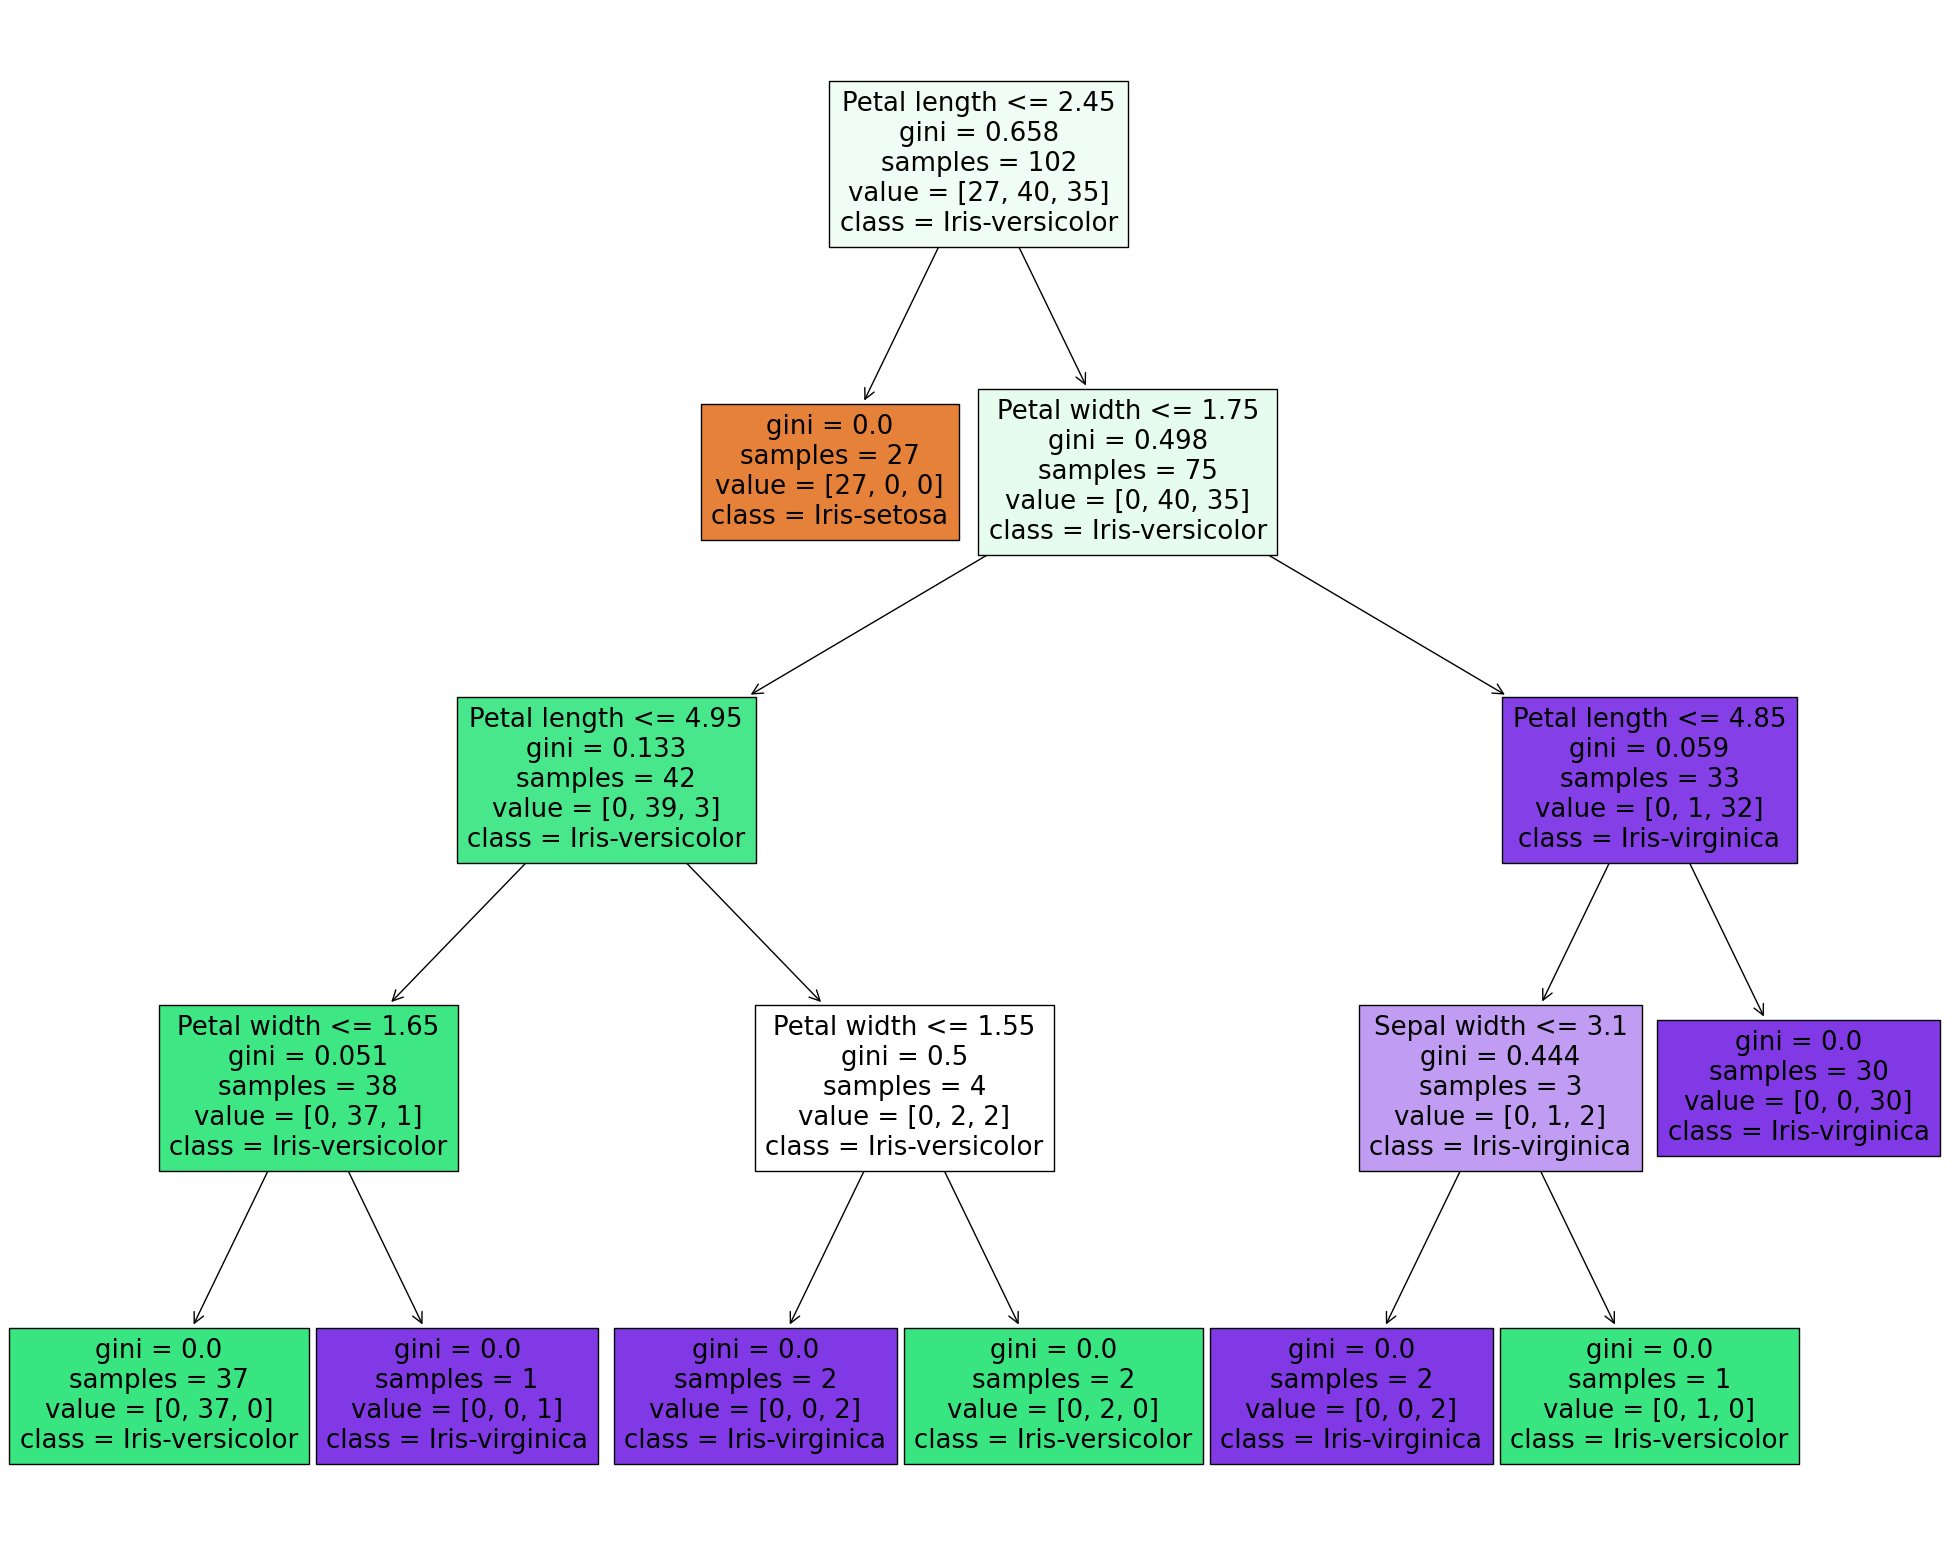

In [29]:
fig = plt.figure(figsize=(25, 20))
tree_img = plot_tree(DT, feature_names = x, class_names = lst , filled = True)